In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
results = pd.read_csv('../results/result.csv')

In [3]:
results

,description,f1,precision,recall
0,logistic regression with tfidf and spacy token...,0.762011,0.806147,0.722458
1,Bi-LSTM,0.808036,0.853774,0.766949
2,bert-base-cased,0.881974,0.893478,0.870763
3,roberta-base,0.908722,0.871595,0.949153
4,xlnet-base-cased,0.894164,0.838590,0.957627
5,albert-base-v2,0.892147,0.881988,0.902542
6,BERTweet,0.899582,0.888430,0.911017
7,roberta-base mean of all tokens from last layer,0.896130,0.862745,0.932203
8,roberta-base max of all tokens from last layer,0.895314,0.845574,0.951271
9,roberta-base mean of all tokens from all layers,0.907614,0.871345,0.947034


In [4]:
l = results.iloc[16:].description.apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+",x)).values.tolist()

In [5]:
df_new = pd.DataFrame(l, columns=['Dropout','Mixout','Multi-Sample Dropout','temp',\
                               'Regularization Coef','Aug_p'])
df_new['F1'] = results.f1.iloc[16:].values
df_new['Precision'] = results.precision.iloc[16:].values
df_new['Recall'] = results.recall.iloc[16:].values

df_new = df_new.drop(['temp'], axis=1)

df_new = df_new.astype(float)

#df_new = df_new.sort_values(['Dropout','Mixout','Multi-Sample Dropout',\
#                               'Regularization Coef','Aug_p'], ascending=[True,True,True,True,True]).reset_index(drop=True)

In [6]:
df_new

,Dropout,Mixout,Multi-Sample Dropout,Regularization Coef,Aug_p,F1,Precision,Recall
0,0.0,0.0,0.0,0.000,0.0,0.901031,0.877510,0.925847
1,0.1,0.0,0.0,0.000,0.0,0.911917,0.892495,0.932203
2,0.2,0.0,0.0,0.000,0.0,0.909639,0.864504,0.959746
3,0.3,0.0,0.0,0.000,0.0,0.902316,0.859885,0.949153
4,0.0,0.0,0.0,0.001,0.0,0.903766,0.892562,0.915254
5,0.0,0.0,0.0,0.005,0.0,0.902821,0.890722,0.915254
6,0.0,0.0,0.0,0.020,0.0,0.910849,0.923747,0.898305
7,0.0,0.0,0.0,0.100,0.0,0.907001,0.894845,0.919492
8,0.1,0.0,3.0,0.000,0.0,0.904905,0.857685,0.957627
9,0.1,0.0,5.0,0.000,0.0,0.906155,0.865125,0.951271


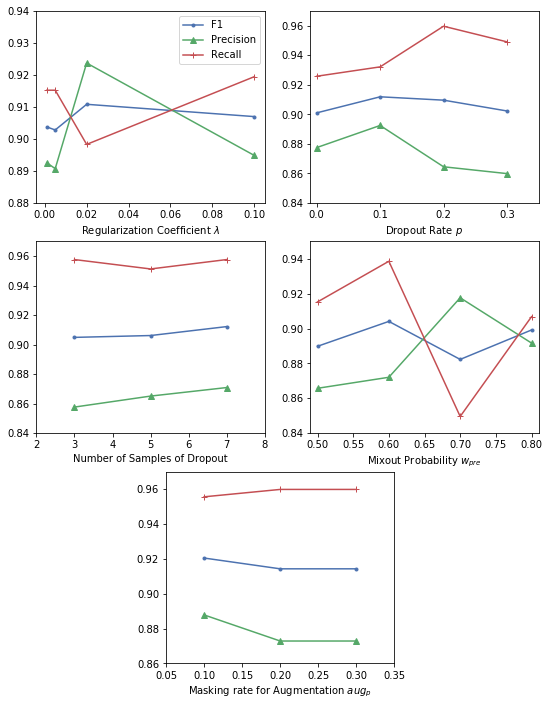

In [13]:
plt.style.use('seaborn-deep')

#fig = plt.figure(figsize=(10,10))

'''
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(325)
ax4 = fig.add_subplot(222)
ax5 = fig.add_subplot(224)
'''
fig, ax = plt.subplots(3,2, figsize=(9,12)) #sharey=True
df1 = df_new.iloc[:4]
ax[0][1].plot(df1['Dropout'],df1.F1, label='F1', marker='.')
ax[0][1].plot(df1['Dropout'],df1.Precision, label='Precision', marker='^')
ax[0][1].plot(df1['Dropout'],df1.Recall, label='Recall', marker='+')
ax[0][1].set_xlabel("Dropout Rate $p$")
ax[0][1].set_xlim(-0.01,.35)
ax[0][1].set_ylim(0.84,.97)

#ax[0][1].set_yticks([.8,.85,.9,.95,1])

df2 = df_new.iloc[4:8]
ax[0][0].plot(df2['Regularization Coef'],df2.F1, label='F1', marker='.')
ax[0][0].plot(df2['Regularization Coef'],df2.Precision, label='Precision', marker='^')
ax[0][0].plot(df2['Regularization Coef'],df2.Recall, label='Recall', marker='+')
ax[0][0].set_ylim(0.88,.94)
#ax[0][1].set_xlim(0,.15)
ax[0][0].set_xlabel("Regularization Coefficient $\lambda$")
ax[0][0].legend(loc='upper right', fontsize=10)
#ax[0][1].set_xticks([0,.001,.005,.05,.01,.1])
#ax2.set_yticks([.85,.9,.95])

df3 = df_new.iloc[8:11]
ax[1][0].plot(df3['Multi-Sample Dropout'],df3.F1, label='F1', marker='.')
ax[1][0].plot(df3['Multi-Sample Dropout'],df3.Precision, label='Precision', marker='^')
ax[1][0].plot(df3['Multi-Sample Dropout'],df3.Recall, label='Recall', marker='+')
ax[1][0].set_xlim(2,8)
ax[1][0].set_ylim(0.84,.97)
ax[1][0].set_xlabel("Number of Samples of Dropout")
#ax3.set_yticks([.8,.85,.9,.95,1])
#ax1.legend()

df4 = df_new.iloc[19:]
ax[1][1].plot(df4['Mixout'],df4.F1, label='F1', marker='.')
ax[1][1].plot(df4['Mixout'],df4.Precision, label='Precision', marker='^')
ax[1][1].plot(df4['Mixout'],df4.Recall, label='Recall', marker='+')
ax[1][1].set_xlim(0.49,.81)
ax[1][1].set_ylim(0.84,.95)
ax[1][1].set_xlabel("Mixout Probability $w_{pre}$")

df5 = df_new.iloc[[16,14,15]]
ax[2][0].plot(df5['Aug_p'],df5.F1, label='F1', marker='.')
ax[2][0].plot(df5['Aug_p'],df5.Precision, label='Precision', marker='^')
ax[2][0].plot(df5['Aug_p'],df5.Recall, label='Recall', marker='+')
ax[2][0].set_xlim(0.05,.35)
ax[2][0].set_ylim(0.86,.97)
ax[2][0].set_xlabel("Masking rate for Augmentation $aug_p$")

box = ax[2][0].get_position()
box.x0 = box.x0 + .2
box.x1 = box.x1 + .2
ax[2][0].set_position(box)

#plt.ylim(.8,1)
plt.yticks([.8,.85,.9,.95,1])

ax[2][1].set_visible(False)

plt.savefig("../visualizations/ablation.png", dpi=200)